In [1]:
#install.packages("tidyverse")
#install.packages("ggrepel")
library('ggrepel')
library('tidyverse')

Loading required package: ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df = read_csv("rpd.csv")
#head(df)
df %>% filter(month.day=="9/1")

Rows: 3577 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): time_corr, month.day
dbl  (10): Mileage, pace_min, Year, Month, Day, numRun, highest, rpd, firstR...
date  (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010-09-01,3.10,0:21:01,6.779570,2010,9,1,9/1,1,0,1,1,1
2011-09-01,2.31,0:16:06,6.969697,2011,9,1,9/1,2,0,1,1,2
2012-09-01,4.30,0:43:31,10.120155,2012,9,1,9/1,3,0,1,1,3
2013-09-01,3.62,0:26:28,7.311234,2013,9,1,9/1,4,0,1,1,4
2014-09-01,5.38,0:39:59,7.431846,2014,9,1,9/1,5,0,1,1,5
2015-09-01,9.59,NA,NA,2015,9,1,9/1,6,0,1,1,6
2016-09-01,3.20,0:17:09,5.359375,2016,9,1,9/1,7,0,1,1,7
2016-09-01,3.14,0:23:32,7.494692,2016,9,1,9/1,8,0,2,0,7
2016-09-01,4.19,NA,NA,2016,9,1,9/1,9,0,3,0,7


In [3]:
df %>% filter(Month=="9") %>% arrange(desc(Mileage)) %>% slice(1:10)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-09-02,18.15,2:09:21,7.126722,2018,9,2,9/2,7,0,1,1,7
2018-09-16,18.04,1:59:23,6.617701,2018,9,16,9/16,9,0,1,1,8
2020-09-12,17.72,2:02:47,6.929082,2020,9,12,9/12,10,0,1,1,9
2018-09-09,17.58,2:00:00,6.825939,2018,9,9,9/9,8,0,1,1,7
2020-09-20,16.26,1:52:40,6.929069,2020,9,20,9/20,13,0,1,1,10
2018-09-30,15.25,1:52:00,7.344262,2018,9,30,9/30,8,0,1,1,8
2025-09-01,14.29,1:45:37,7.390949,2025,9,1,9/1,15,1,1,1,13
2019-09-08,14.08,1:34:27,6.708097,2019,9,8,9/8,8,0,1,1,7
2019-09-01,14.06,1:33:59,6.684448,2019,9,1,9/1,12,0,1,1,10


In [4]:
dfh = df %>%
    filter(highest==1 & Year<2020)
dfh

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-06-02,6.00,0:41:34,6.927778,2017,6,2,6/2,4,1,1,1,4
2019-10-13,13.10,1:22:46,6.318066,2019,10,13,10/13,8,1,1,1,7
2014-12-08,5.00,NA,NA,2014,12,8,12/8,3,1,1,1,3
2019-12-12,6.51,0:46:36,7.158218,2019,12,12,12/12,4,1,1,1,4
2018-12-15,10.00,NA,NA,2018,12,15,12/15,4,1,1,1,4
2018-12-29,2.87,NA,NA,2018,12,29,12/29,5,1,1,1,5


In [5]:
dfh = df %>%
    filter(numRun==1 & Year>2015)
dfh

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-01-02,7.22,0:49:50,6.902124,2016,1,2,1/2,1,0,1,1,1
2016-02-17,7.63,NA,NA,2016,2,17,2/17,1,0,1,1,1
2016-02-26,6.92,0:50:05,7.237476,2016,2,26,2/26,1,0,1,1,1
2020-02-29,9.88,1:08:13,6.904521,2020,2,29,2/29,1,0,1,1,1
2016-03-05,7.14,0:53:56,7.553688,2016,3,5,3/5,1,0,1,1,1
2017-03-21,3.01,0:23:15,7.724252,2017,3,21,3/21,1,0,1,1,1
2017-03-24,10.29,1:07:52,6.595400,2017,3,24,3/24,1,0,1,1,1
2016-03-28,3.45,0:24:45,7.173913,2016,3,28,3/28,1,0,1,1,1
2016-03-29,4.26,0:30:00,7.042254,2016,3,29,3/29,1,0,1,1,1


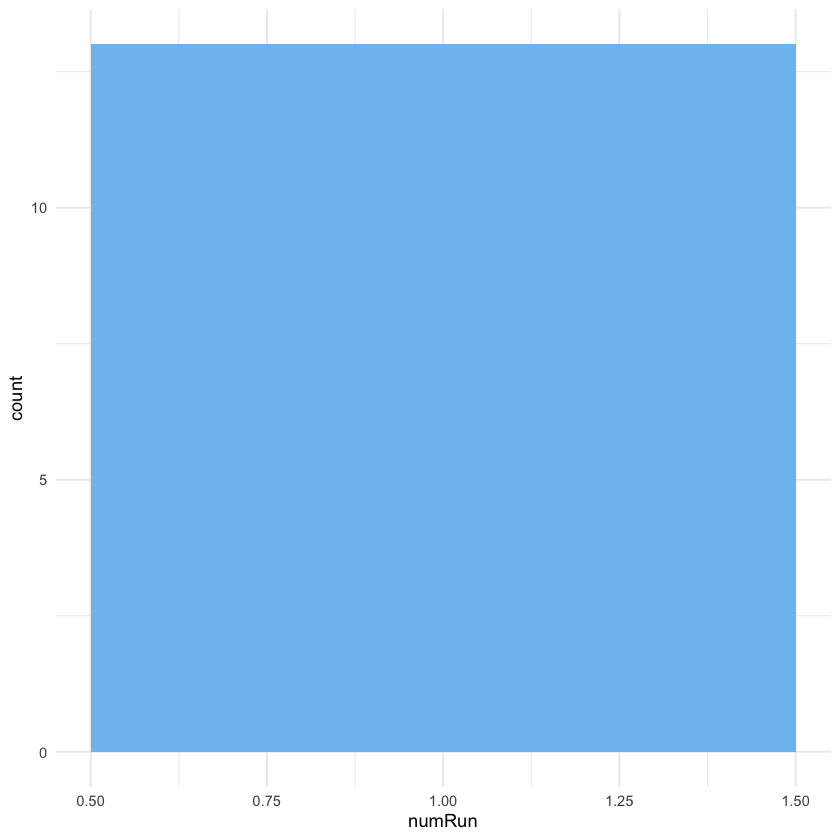

In [6]:
p = ggplot(dfh, aes(x=numRun)) +
    geom_histogram(binwidth=1, fill="skyblue2") +
    theme_minimal()
p

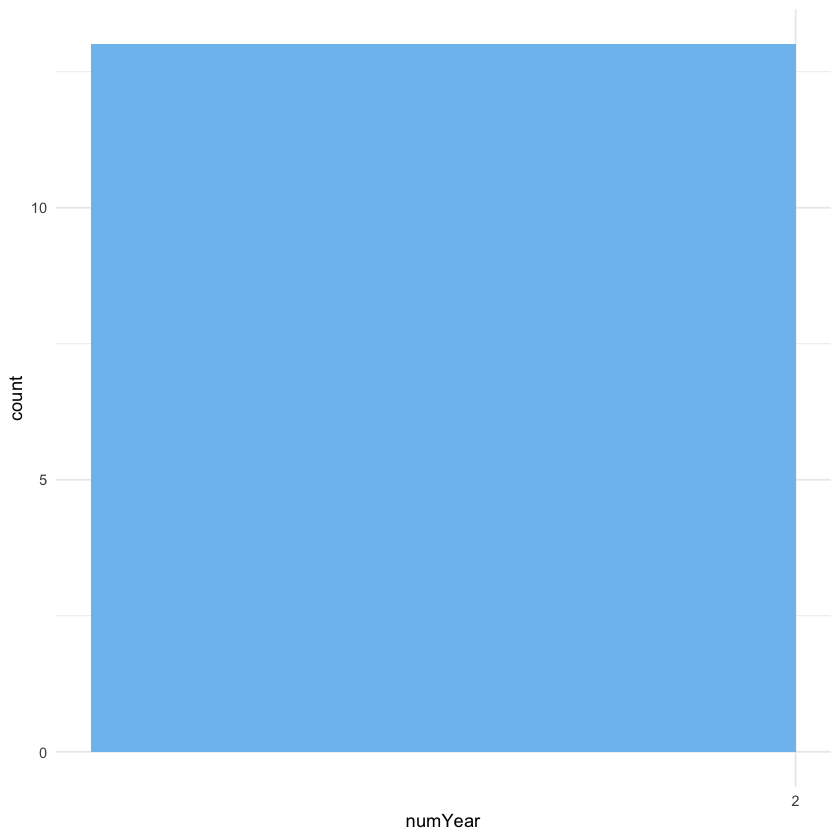

In [7]:
p2 = ggplot(dfh, aes(x=numYear)) +
    geom_histogram(binwidth=1, fill="skyblue2") +
    theme_minimal() +
    scale_x_continuous(breaks=c(-0.5,1.5,3.5,5.5,7.5,9.5,11.5,13.5),labels=c(0,2,4,6,8,10,12,14))
p2

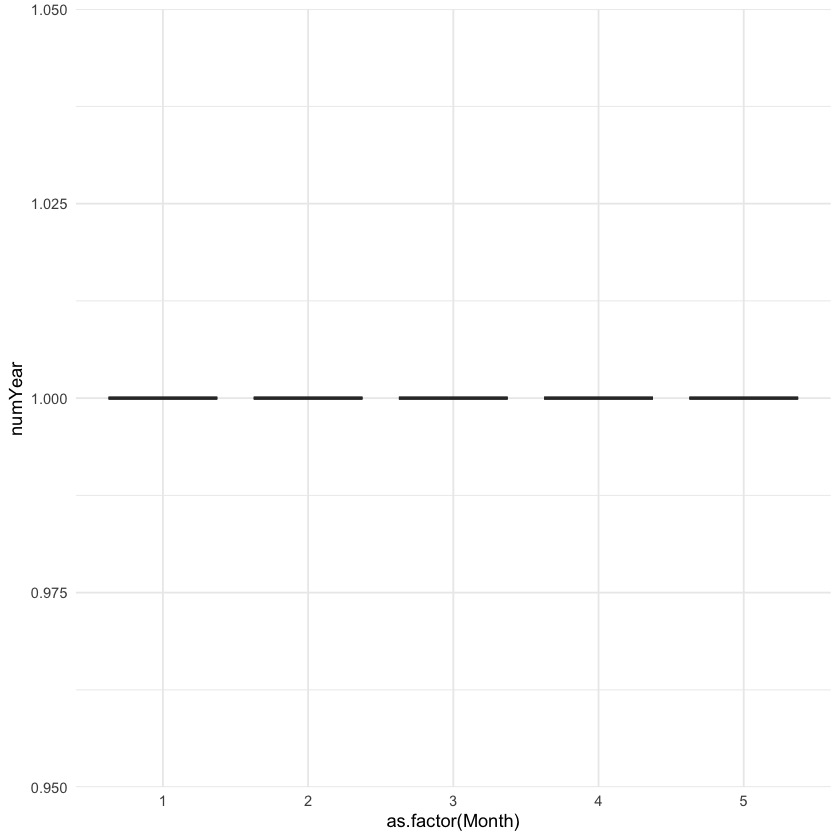

In [8]:
p3 = ggplot(dfh, aes(x=as.factor(Month), y=numYear)) +
    geom_boxplot() +
    theme_minimal()
p3

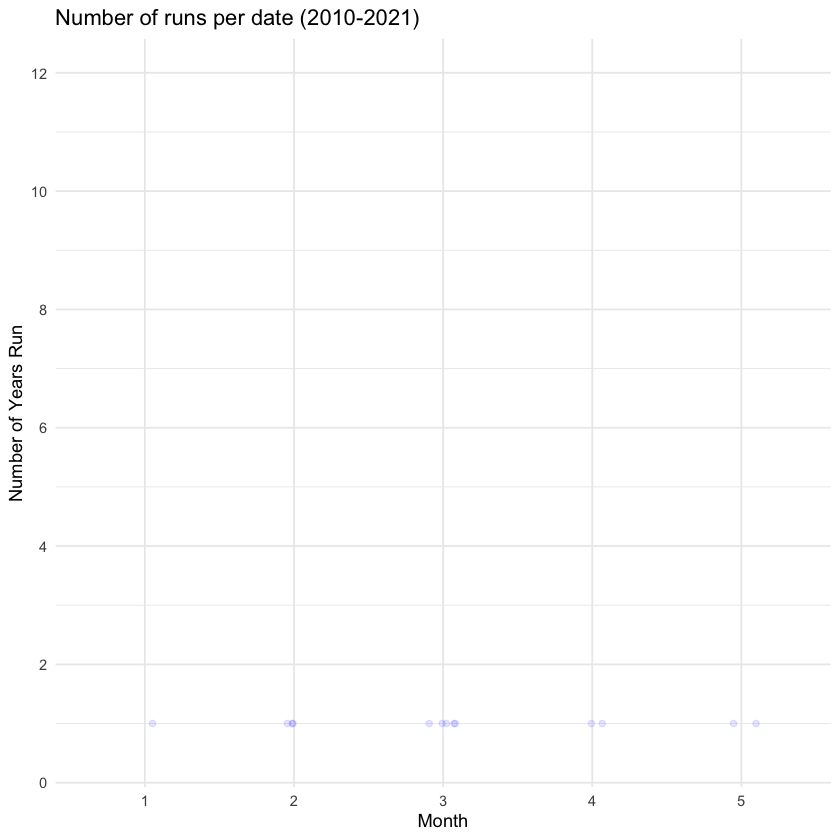

In [9]:
p3 = ggplot(dfh, aes(x=as.factor(Month), y=numYear)) +
    geom_point(position = position_jitter(h=0,w=0.1), color="blue", alpha=.1) +
    theme_minimal() +
    scale_y_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12)) +
    coord_cartesian(ylim = c(0.5,12)) +
    ggtitle("Number of runs per date (2010-2021)") +
    labs(x="Month",y="Number of Years Run")
p3

In [10]:
dfh %>%
    mutate(Date1 = paste(Month,"/",Day, sep="")) %>%
    group_by(Month) %>%
    select("Month","Date1","numYear") %>%
    arrange(numYear) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

Month,Date1,numYear,rk
<dbl>,<chr>,<dbl>,<int>
1,1/2,1,1
2,2/17,1,1
3,3/5,1,1
4,4/12,1,1
5,5/23,1,1


In [11]:
dfh %>%
    mutate(Date1 = paste(Month,"/",Day, sep="")) %>%
    group_by(Month) %>%
    select("Month","Date1","numYear") %>%
    arrange(-numYear) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

Month,Date1,numYear,rk
<dbl>,<chr>,<dbl>,<int>
1,1/2,1,1
2,2/17,1,1
3,3/5,1,1
4,4/12,1,1
5,5/23,1,1


In [12]:
YTD <- function(df1, DateOrder, Month, Day){
df1 %>%
    mutate(DateOrder =
           ifelse(Month==1, Day,
                  ifelse(Month==2, 31+Day,
                         ifelse(Month==3, 60+Day,
                                ifelse(Month==4, 91+Day,
                                       ifelse(Month==5, 121+Day,
                                              ifelse(Month==6, 152+Day,
                                                     ifelse(Month==7, 182+Day,
                                                            ifelse(Month==8, 213+Day,
                                                                   ifelse(Month==9, 244+Day,
                                                                          ifelse(Month==10, 274+Day,
                                                                                 ifelse(Month==11, 305+Day,
                                                                                        ifelse(Month==12, 335+Day, NA
                                                                                               )))))))))))))
}

In [13]:
dfd <- YTD(df1=dfh, DateOrder=DateOrder, Month=Month, Day=Day)
tail(dfd)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-03-28,3.45,0:24:45,7.173913,2016,3,28,3/28,1,0,1,1,1,88
2016-03-29,4.26,0:30:00,7.042254,2016,3,29,3/29,1,0,1,1,1,89
2016-04-12,3.86,0:30:02,7.780656,2016,4,12,4/12,1,0,1,1,1,103
2016-04-18,6.50,NA,NA,2016,4,18,4/18,1,0,1,1,1,109
2016-05-23,2.60,0:20:00,7.692308,2016,5,23,5/23,1,0,1,1,1,144
2016-05-30,3.29,0:26:12,7.963526,2016,5,30,5/30,1,0,1,1,1,151


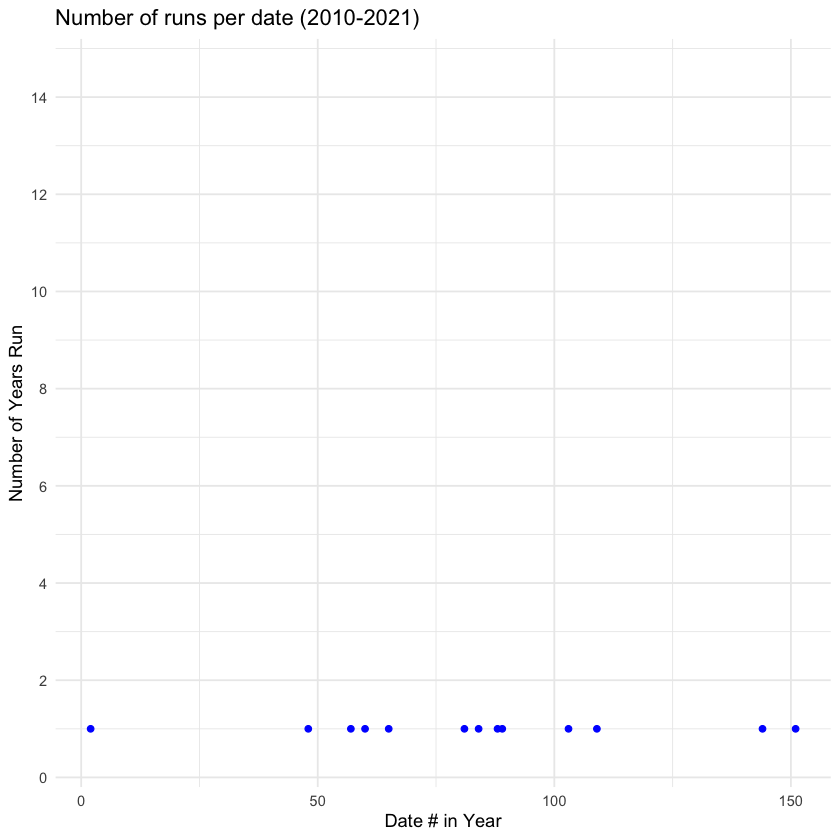

In [14]:
p4 = ggplot(dfd, aes(x=DateOrder, y=numYear)) +
    geom_point(color="blue") +
    theme_minimal() +
    scale_y_continuous(breaks=c(0,2,4,6,8,10,12,14), labels=c(0,2,4,6,8,10,12,14)) +
    coord_cartesian(ylim = c(0.5,14.5)) +
    ggtitle("Number of runs per date (2010-2021)") +
    labs(x="Date # in Year",y="Number of Years Run")
p4

In [15]:
df2 <- YTD(df, DateOrder, Month, Day)
# head(df2)
tail(df2)
#df2

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,DateOrder
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-12-30,4.00,0:33:03,8.262500,2024,12,30,12/30,10,1,1,1,10,365
2015-12-31,5.55,0:38:47,6.987988,2015,12,31,12/31,1,0,1,1,1,366
2016-12-31,5.37,0:42:46,7.963998,2016,12,31,12/31,2,0,1,1,2,366
2017-12-31,7.00,0:51:16,7.323810,2017,12,31,12/31,3,0,1,1,3,366
2020-12-31,6.00,0:44:49,7.469444,2020,12,31,12/31,4,0,1,1,4,366
2024-12-31,7.00,0:53:04,7.580952,2024,12,31,12/31,5,1,1,1,5,366


In [16]:
df2s <- df2 %>%
    group_by(DateOrder) %>%
    summarize(SumMi = sum(Mileage))
tail(df2s)

DateOrder,SumMi
<dbl>,<dbl>
361,52.34
362,46.13
363,51.84
364,24.67
365,51.27
366,30.92


In [17]:
df2d <- full_join(dfd, df2s, by="DateOrder") %>%
    mutate(numYear_cat = ifelse(numYear<(max(numYear)-9),"less",numYear)) %>%
    mutate(numYear_cat = fct_relevel(numYear_cat, c("less","4","5","6","7","8","9")))
#df2d
df2d %>% tail(3)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `numYear_cat = fct_relevel(numYear_cat, c("less", "4",
  "5", "6", "7", "8", "9"))`.
[1mCaused by error in `fct_relevel()`:[22m
[1m[22m[33m![39m `.f` must be a factor or character vector, not a logical vector.


In [18]:
df2e <- df2d %>%
    mutate(MMDD = paste(Month,"/",Day, sep="")) %>%
    select("MMDD","Month","Day","DateOrder","numYear","numYear_cat","SumMi")
df2e %>% filter(Month==12)

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [19]:
p5 = ggplot(df2d, aes(x=SumMi)) +
    geom_histogram(fill="skyblue2", binwidth=5) +
    theme_minimal() +
    labs(x="Mileage per Date")
p5

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [20]:
options(repr.plot.width=7, repr.plot.height=5)
p6 = ggplot(df2d, aes(x=Month,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Month",y="Mileage per Date",title="Number of Miles by Day of Year (2020 onwards)") +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p6

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [21]:
df2o <- df2e %>%
    mutate(szn = ifelse(Month<=3,1,
                        ifelse(Month<=6,2,
                               ifelse(Month<=9,3,4)))) %>%
    group_by(szn) %>%
    mutate(minmaxszn = ifelse(SumMi==min(SumMi) | SumMi==max(SumMi),1,0)) %>%
    ungroup() %>%
    filter(minmaxszn==1) %>%
    # This mutate function will need to be updated whenever a new date meets the above criteria
    # Preferably, it should be automated better at some point
    mutate(Mon_DD = c("Feb 29","Mar 1","Apr 1","May 23","Jul 5","Sep 16","Oct 2","Dec 8")) %>%
    mutate(ny = c(90,15,90,10,35,120,103,18)) %>%
    mutate(nx = c(48,50,128,125,215,300,305,325))
df2o

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [22]:
p6a = ggplot(df2d, aes(x=DateOrder,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Date # in Year",y="Mileage per Date",title="Total miles run on each date over 12 years (2010-2021)")
p6a

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [23]:
p6b = ggplot(df2d, aes(x=DateOrder,y=SumMi)) +
    geom_point(position=position_jitter(w=.1,h=0),color="blue",alpha=.3) +
    theme_minimal() +
    labs(x="Date # in Year",y="Mileage per Date",title="Total miles run on each date over 12 years (2010-2021)") +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -15,
            segment.size = .5,
            size = 2.5,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        )
p6b

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [24]:
p6c = ggplot(df2d, aes(x=DateOrder,y=SumMi,color=numYear_cat)) +
    geom_point(position=position_jitter(w=.1,h=0),alpha=1) +
    theme_bw() +
    labs(x="Date",y="Mileage per Date",color="Number of Runs",
         title="Total miles run on each date") +
    scale_color_brewer(type="div", palette=9, direction=-1) +
    scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367), 
                       labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                                "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                       minor_breaks=NULL) +
    scale_y_continuous(limits=c(0,max(df2d$SumMi)+5), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
    coord_cartesian(ylim=c(4.67,max(df2d$SumMi))) +
    geom_text_repel(
            data = df2o,
            nudge_y = 1,
            nudge_x = -20,
            segment.size = .5,
            size = 2.5,
            hjust = 1,
            segment.color = "grey50",
            point.padding = .3,
            aes(x=DateOrder, y=SumMi, label = Mon_DD),
        )
p6c

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [25]:
p6d = ggplot(df2d, aes(x=DateOrder,y=SumMi,fill=numYear_cat)) +
  geom_point(position=position_jitter(w=0,h=0),alpha=1, shape=21, size=5) +
  theme_bw() +
  labs(x="Date",y="Mileage per Date",fill="Number of Runs",
       title="Total miles run on each date") +
  scale_fill_brewer(type="div", palette=9, direction=-1) +
  scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367),
                     labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                              "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                     minor_breaks=NULL) +
  scale_y_continuous(limits=c(0,max(df2d$SumMi)+5), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
  coord_cartesian(xlim=c(1,366), ylim=c(4.67,max(df2d$SumMi))) +
  theme(plot.title = element_text(size = 22),
        legend.title = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 14),
        legend.text = element_text(size = 14)) +
  geom_text_repel(
    data = df2o,
    segment.size = .5,
    size = 5,
    hjust = 1,
    segment.color = "grey50",
    point.padding = .3,
    aes(x=DateOrder, y=SumMi, label = Mon_DD, nudge_y = ny, nudge_x = nx),
  )
p6d

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [26]:
df2e %>% select("MMDD","numYear","SumMi") %>% arrange(-SumMi) %>% head(20)

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [27]:
df2e %>% select("MMDD","numYear","SumMi") %>% arrange(-SumMi) %>% tail(10)

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [28]:
df2e %>%
    group_by(Month) %>%
    arrange(-SumMi) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [29]:
df2e %>%
    group_by(Month) %>%
    arrange(SumMi) %>%
    mutate(rk=row_number()) %>%
    filter(rk==1)

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [30]:
df2e %>%
    group_by(Month) %>%
    summarize(mean = mean(SumMi))

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [31]:
options(repr.plot.height=6, repr.plot.width=8)
p7 = ggplot(df2d, aes(x=numYear,y=SumMi)) +
    geom_point(alpha=.3,color="blue") +
    theme_minimal() +
    labs(x="Number of Runs per Date",y="Mileage per Date",title="Mileage and Number of Runs Per Date (2010-2021)") +
    theme(legend.position="top") +
    coord_cartesian(ylim=c(4,96),xlim=c(.5,12)) +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p7

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [32]:
options(repr.plot.height=6, repr.plot.width=8)
p7a = ggplot(df2d, aes(x=numYear,y=SumMi,color=as.factor(Month))) +
    geom_point(alpha=.3) +
    theme_minimal() +
    labs(x="Number of Runs per Date",y="Mileage per Date",title="Mileage and Number of Runs Per Date (2010 onwards)",
        color="Month") +
    theme(legend.position="bottom") +
    coord_cartesian(ylim=c(4,max(df2d$SumMi)),xlim=c(.5,max(df2d$numYear))) +
    scale_x_continuous(breaks=c(0,2,4,6,8,10,12), labels=c(0,2,4,6,8,10,12))
p7a

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [33]:
head(df2e)

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [34]:
df2e %>% summarize(mean_mi = mean(SumMi), sd_mi = sd(SumMi), mean_n = mean(numYear), sd_n = sd(numYear))

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [35]:
cor(df2e$numYear, df2e$SumMi)

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [36]:
cov(df2e$numYear, df2e$SumMi)

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [37]:
df2e %>% 
group_by(Month) %>%
summarize(mean_mi = mean(SumMi), sd_mi = sd(SumMi), mean_n = mean(numYear), sd_n = sd(numYear))

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [38]:
df2e %>%
    filter(Month==10)

ERROR: Error in eval(expr, envir, enclos): object 'df2e' not found


In [39]:
png("rpd.png", width=1200, height=800)
ggplot(df2d, aes(x=DateOrder,y=SumMi,fill=numYear_cat)) +
  geom_point(position=position_jitter(w=0,h=0),alpha=1, shape=21, size=5) +
  theme_bw() +
  labs(x="Date",y="Mileage per Date",fill="Number of Runs",
       title="Total miles run on each date") +
  scale_fill_brewer(type="div", palette=9, direction=-1) +
  scale_x_continuous(breaks=c(1,32,61,92,122,153,183,214,245,275,306,336,367),
                     labels=c("Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1",
                              "Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1","Jan 1"),
                     minor_breaks=NULL) +
  scale_y_continuous(limits=c(0,max(df2d$SumMi)+5), breaks=c(0,25,50,75,100), labels=c(0,25,50,75,100)) +
  coord_cartesian(xlim=c(1,366), ylim=c(4.67,max(df2d$SumMi))) +
  theme(plot.title = element_text(size = 22),
        legend.title = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 14),
        legend.text = element_text(size = 14)) +
  geom_text_repel(
    data = df2o,
    segment.size = .5,
    size = 5,
    hjust = 1,
    segment.color = "grey50",
    point.padding = .3,
    aes(x=DateOrder, y=SumMi, label = Mon_DD, nudge_y = ny, nudge_x = nx),
  )
dev.off()

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [40]:
df2d %>% head(10)

ERROR: Error in eval(expr, envir, enclos): object 'df2d' not found


In [41]:
df3 <- df %>% 
    mutate(weekday = weekdays(Date))
df3$weekday <- fct_relevel(df3$weekday, "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
df3 %>% tail(20)

Date,Mileage,time_corr,pace_min,Year,Month,Day,month.day,numRun,highest,rpd,firstRun,numYear,weekday
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2011-12-29,4.20,0:30:58,7.373016,2011,12,29,12/29,1,0,1,1,1,Thursday
2014-12-29,3.50,0:24:08,6.895238,2014,12,29,12/29,2,0,1,1,2,Monday
2016-12-29,7.00,0:50:35,7.226190,2016,12,29,12/29,3,0,1,1,3,Thursday
2017-12-29,7.10,0:53:16,7.502347,2017,12,29,12/29,4,0,1,1,4,Friday
2018-12-29,2.87,NA,NA,2018,12,29,12/29,5,1,1,1,5,Saturday
2010-12-30,5.10,0:42:42,8.372549,2010,12,30,12/30,1,0,1,1,1,Thursday
2011-12-30,6.10,0:49:18,8.081967,2011,12,30,12/30,2,0,1,1,2,Friday
2012-12-30,4.47,0:35:22,7.912006,2012,12,30,12/30,3,0,1,1,3,Sunday
2014-12-30,4.25,0:35:43,8.403922,2014,12,30,12/30,4,0,1,1,4,Tuesday


In [42]:
df3 %>% 
    # filter(Year<2019) %>%
    group_by(weekday) %>%
    summarize(miles = sum(Mileage),
              n_runs = n()) %>%
    arrange(-miles)

weekday,miles,n_runs
<fct>,<dbl>,<int>
Saturday,3966.97,556
Wednesday,3642.83,537
Tuesday,3342.10,558
Friday,3328.71,579
Thursday,3149.54,531
Sunday,2837.89,366
Monday,2654.97,450


In [43]:
df3 %>% 
    filter(Year==2018) %>%
    group_by(weekday) %>%
    summarize(miles = sum(Mileage),
              n_runs = n()) %>%
    arrange(-miles)

weekday,miles,n_runs
<fct>,<dbl>,<int>
Tuesday,494.89,63
Wednesday,469.31,57
Saturday,441.79,50
Thursday,439.82,55
Sunday,419.14,39
Friday,419.06,57
Monday,290.99,41


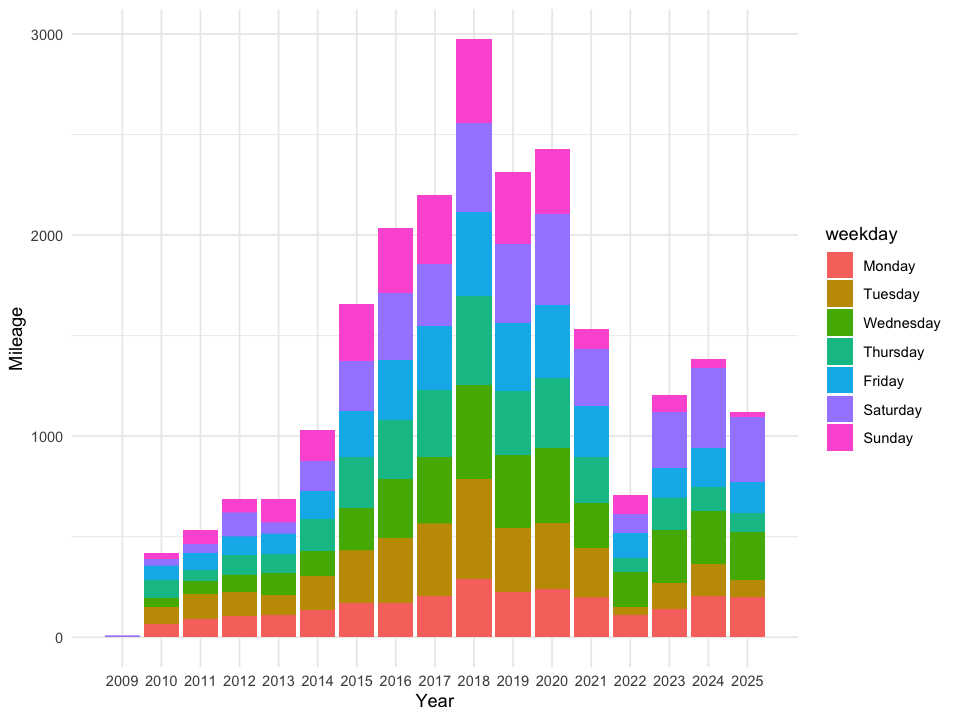

In [44]:
p8 = ggplot(df3, aes(x=Year, y=Mileage, fill=weekday)) +
    geom_col(position=position_stack(reverse=TRUE)) +
    theme_minimal() +
    scale_x_continuous(breaks=seq(from=2009,to=2025,by=1),minor_breaks=NULL)
p8

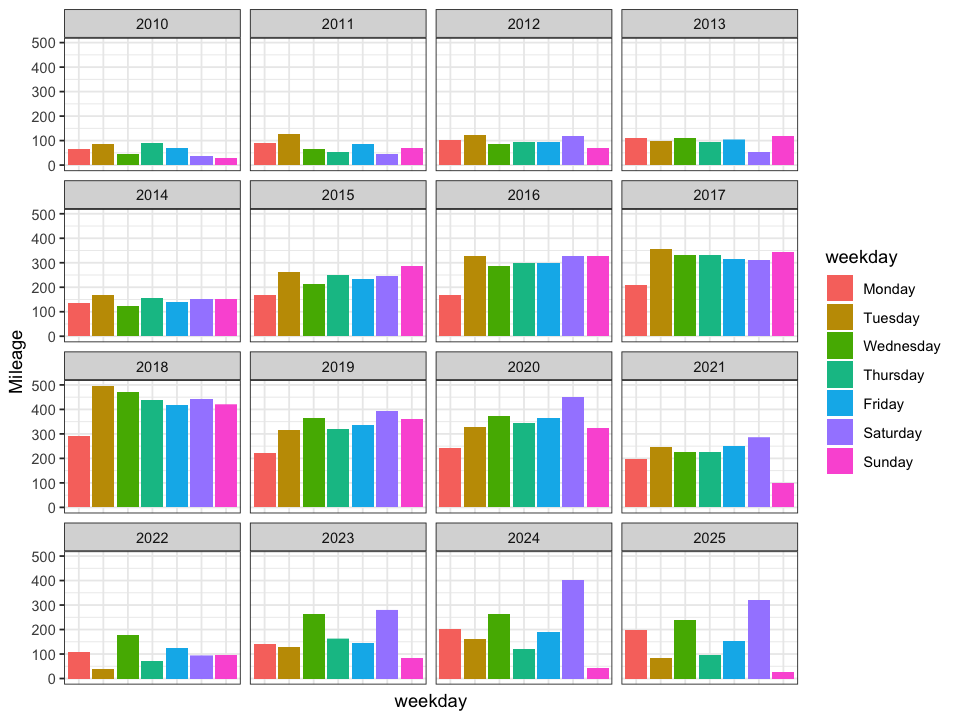

In [45]:
p8a = ggplot(data = df3 %>% filter(Year >= 2010 & Year <= 2025), 
             mapping = aes(x=weekday, y=Mileage, fill=weekday)) +
    geom_col() +
    theme_bw() +
    facet_wrap(~Year) +
    scale_x_discrete(labels=NULL) +
    theme(axis.ticks.x=element_blank())
p8a

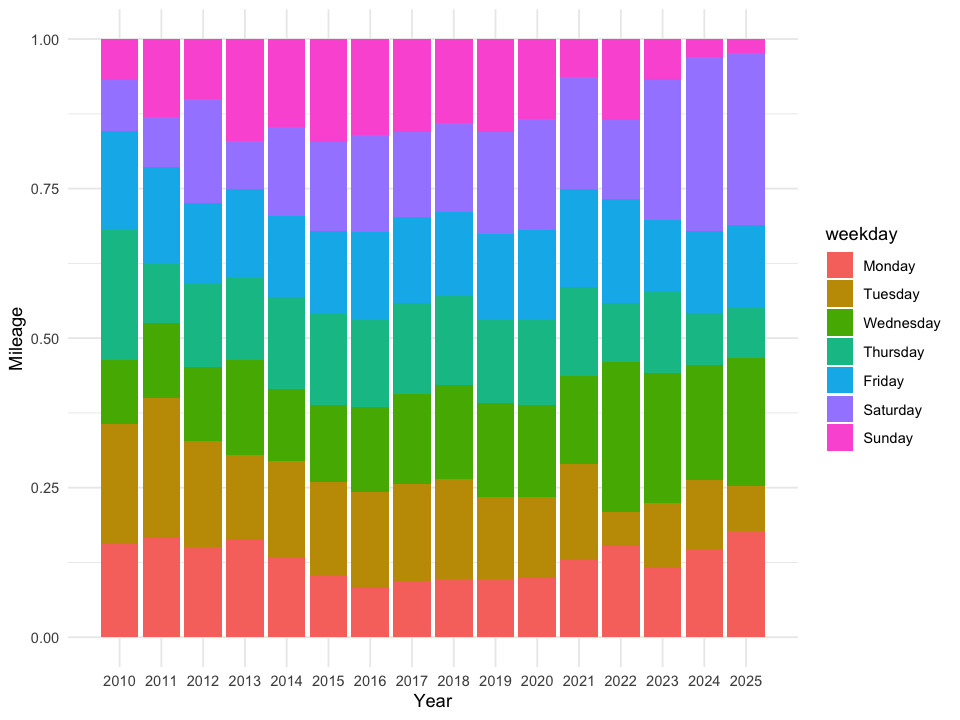

In [46]:
p8b = ggplot(data = df3 %>% filter(Year >= 2010), 
             mapping = aes(x=Year, y=Mileage, fill=weekday)) +
    geom_col(position=position_fill(reverse=TRUE)) +
    theme_minimal() +
    scale_x_continuous(breaks=seq(from=2010,to=2025,by=1),minor_breaks=NULL)
p8b